In [12]:
using NeutrinoTelescopes
using Plots
using GaussianProcesses

# Photon Propagation

## Medium Setup

In [7]:
medium = make_cascadia_medium_properties(Float32)
material_density(medium), radiation_length(medium)

(1013.2627f0, 36.08f0)

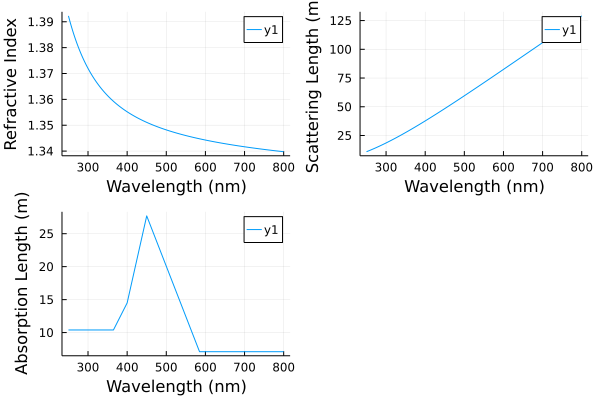

In [31]:
wavelengths = 250.:800 # nm

p1 = plot(wavelengths, refractive_index.(wavelengths, Ref(medium)), xlabel="Wavelength (nm)", ylabel="Refractive Index")
p2 = plot(wavelengths, scattering_length.(wavelengths, Ref(medium)), xlabel="Wavelength (nm)", ylabel="Scattering Length (m)")
p3 = plot(wavelengths, absorption_length.(wavelengths, Ref(medium)), xlabel="Wavelength (nm)", ylabel="Absorption Length (m)")

plot(p1, p2, p3, layout= grid(2, 2))


In [32]:
grid(2, 2)

Plots.GridLayout(2, 2)

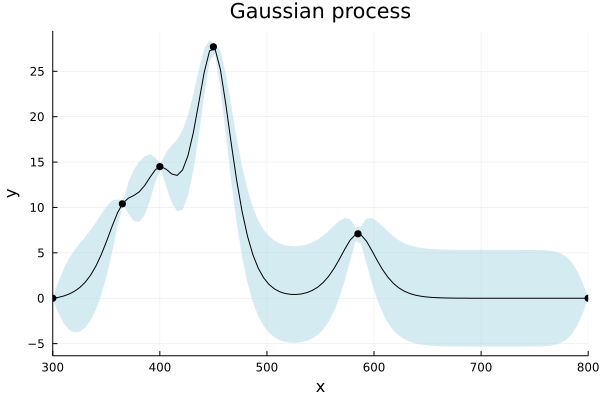

In [41]:
T = Float64
x = [T(300.0), T(365.0), T(400.0), T(450.0), T(585.0), T(800.0)]
y = [T(0), T(10.4), T(14.5), T(27.7), T(7.1), T(0)]
mZero = MeanZero()                 
kern = Mat52Iso(3., 1.)
                
logObsNoise = -3.0                        # log standard deviation of observation noise (this is optional)
gp = GP(x,y,mZero,kern,logObsNoise)   
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false)  

In [42]:
using Optim
optimize!(gp) 


LinearAlgebra.PosDefException(3)


 * Status: success

 * Candidate solution
    Final objective value:     2.211043e+01

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 7.10e-08 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.53e-08 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.42e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.43e-16 ≰ 0.0e+00
    |g(x)|                 = 4.86e-10 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    17
    f(x) calls:    67
    ∇f(x) calls:   67


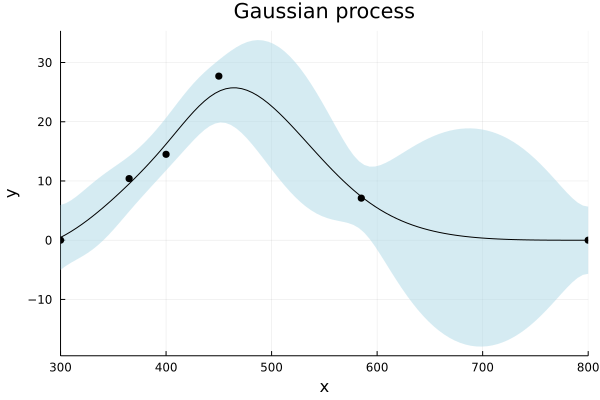

In [43]:
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false)  

In [45]:
gp(wavelengths)

MethodError: MethodError: objects of type GPE{LinearAlgebra.Adjoint{Float64, Vector{Float64}}, Vector{Float64}, MeanZero, Mat52Iso{Float64}, GaussianProcesses.FullCovariance, GaussianProcesses.IsotropicData{Matrix{Float64}}, PDMats.PDMat{Float64, Matrix{Float64}}, GaussianProcesses.Scalar{Float64}} are not callable